In [2]:
%matplotlib inline
from lightkurve import TessTargetPixelFile
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

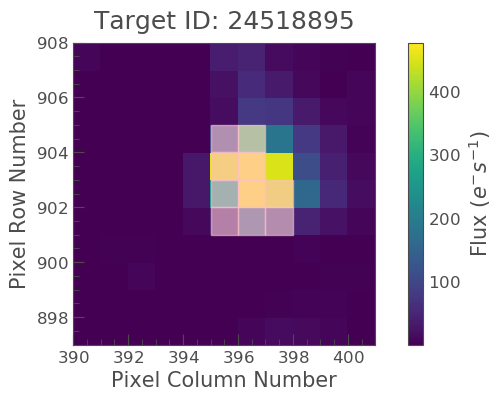

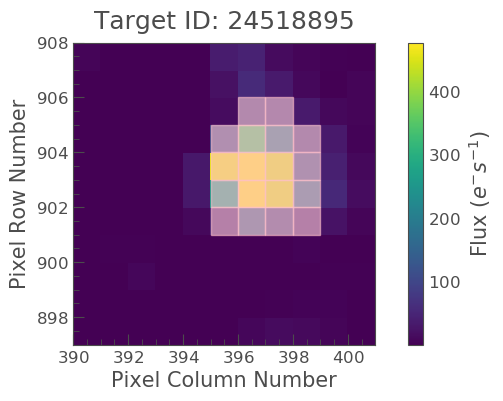

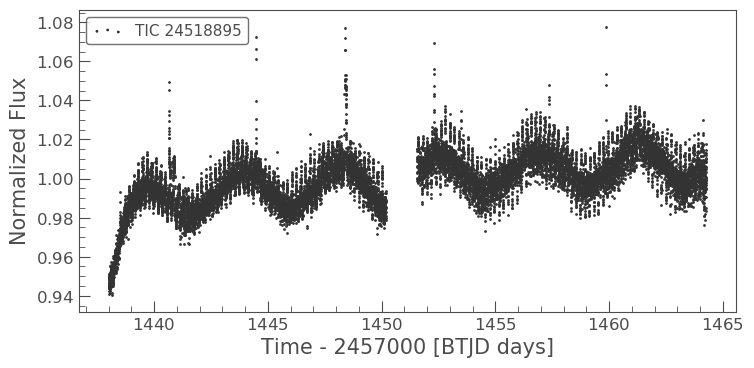

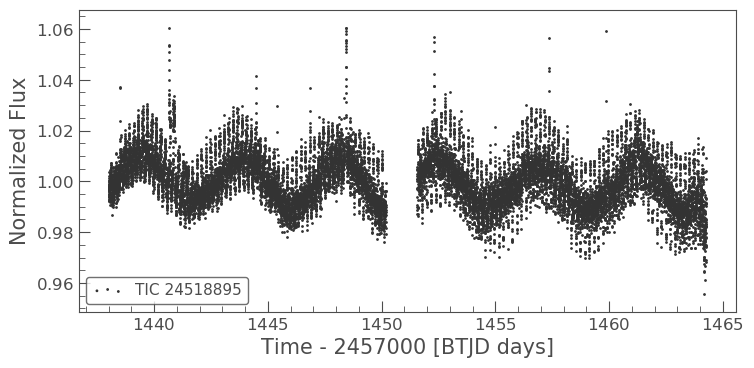

In [5]:
tpf = TessTargetPixelFile('https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2018319095959-s0005-0000000024518895-0125-s_tp.fits')

tpf.plot(aperture_mask=tpf.pipeline_mask)
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

# Create a median image of the source over time
median_image = np.nanmedian(tpf.flux, axis=0)

# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 85)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask)
lc2 = tpf.to_lightcurve(aperture_mask=aperture_mask)

clipped_lc = lc.remove_outliers(sigma=6)
clipped_lc2 = lc2.remove_outliers(sigma=6)
ax = clipped_lc.scatter()
ax = clipped_lc2.scatter()

tpf.interact()
